In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
msu = {
    1001: 'KoU',
    1002: 'ViVe',
    1003: 'Tahko',
    1004: 'Manse',
    1005: 'SoJy',
    1006: 'KPL',
    1007: 'JyJu',
    1008: 'IPV',
    1009: 'JoMa',
    1010: 'KaMa',
    1011: 'KeKi',
    1012: 'KiPa',
    1013: 'PattU',
    1014: 'SiiPe',
    1015: 'HP'
}

nsu = {
    2001: 'Fera',
    2002: 'Tahko',
    2003: 'JoMa',
    2004: 'KeKi',
    2005: 'Kirittäret',
    2006: 'Virkiä',
    2007: 'Manse',
    2008: 'MyVe',
    2009: 'PesäYsit',
    2010: 'Pesäkarhut',
    2011: 'SMJ',
    2012: 'SiiPe',
    2013: 'Roihu'
}

In [11]:
csv_name = 'runs_msu_2021'
all_runs = pd.read_csv('./{}.csv'.format(csv_name), low_memory=False)

all_runs_msu = pd.read_csv('./{}.csv'.format(csv_name), low_memory=False)

men_runkosarja = 1630022425
women_runkosarja = 1629849625

all_runs.head()

myve = all_runs[all_runs['team'] == 2008]
myve

,id,base,lahto,aika,gameId,eventId,firsttime,lukkari,opponent,team,runner,streamUrl,run_date,uploader,leagueId,free,juoksu,unix_time


In [12]:
runs = all_runs[all_runs['base'] == 3]
# runs = runs[runs['team'] == 1001]
runs = runs[runs['aika'] < 6]
runs = runs[runs['unix_time'] > men_runkosarja]

by_day = runs.groupby(by='unix_time').mean()
by_day['juoksu'].head()

unix_time
1630073880    5.029999
1630074600    5.131304
1630155600    5.069999
1630242000    5.199999
1630245600    4.982726
Name: juoksu, dtype: float64

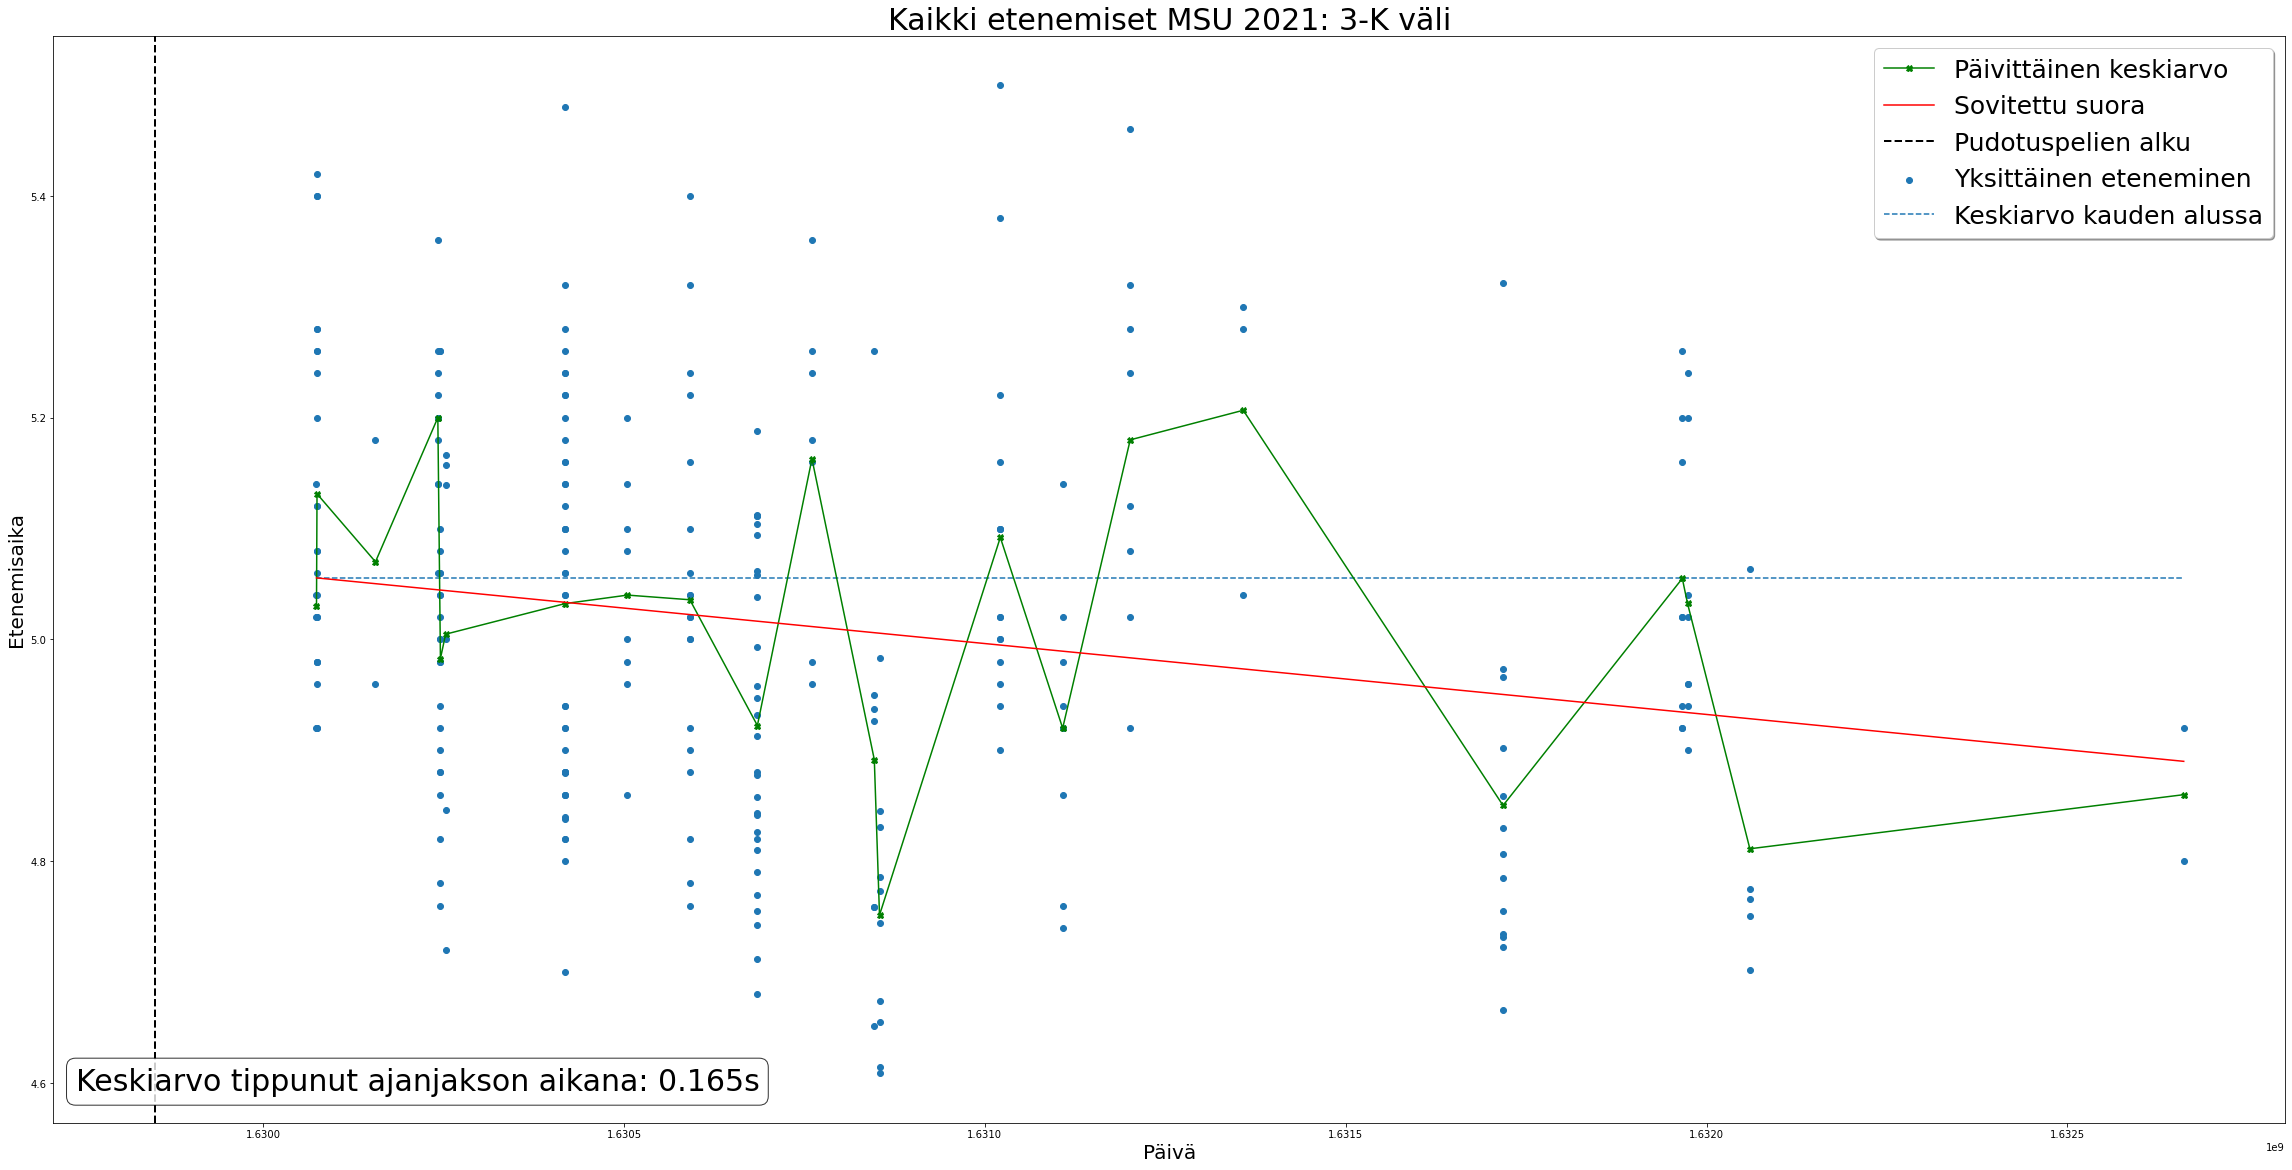

In [13]:
fig, ax = plt.subplots(figsize = (40, 20))

y = runs['juoksu']
x = runs['unix_time']
plt.plot(by_day.juoksu, marker='X', label="Päivittäinen keskiarvo", color="g")
plt.scatter(x, y, label="Yksittäinen eteneminen")
mean_line = plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color="r", label="Sovitettu suora")
box = mean_line[0]

mean_x = box.get_data()[0]
mean_y = box.get_data()[1]
mean_x0 = mean_x[0]
mean_x1 = mean_x[-1]
mean_y0 = mean_y[0]
mean_y1 = mean_y[-1]
k = (mean_y1 - mean_y0) / (mean_x1 - mean_x0)
diff = mean_y1 - mean_y0

plt.hlines(y=mean_y0, xmin=mean_x0, xmax=mean_x1, ls="--", label="Keskiarvo kauden alussa")

plt.axvline(x=1629849625, color="black", lw=2, ls="--", label="Pudotuspelien alku")

plt.title("Kaikki etenemiset MSU 2021: 3-K väli", fontsize=30)

plt.ylabel("Etenemisaika", fontsize=20)
plt.xlabel("Päivä", fontsize=20)

props = dict(boxstyle='round', facecolor='white', alpha=0.8)
ax.text(0.01, 0.03, 'Keskiarvo tippunut ajanjakson aikana: {}s'.format(round(-diff, 3)), transform=ax.transAxes, fontsize=30, bbox=props)

plt.legend(shadow=True, fontsize=25)
plt.show()

# fig.savefig('./kaikki_etenemiset_pudotuspelit_3K_{}.png'.format(csv_name))

# MSU

### 12-väli

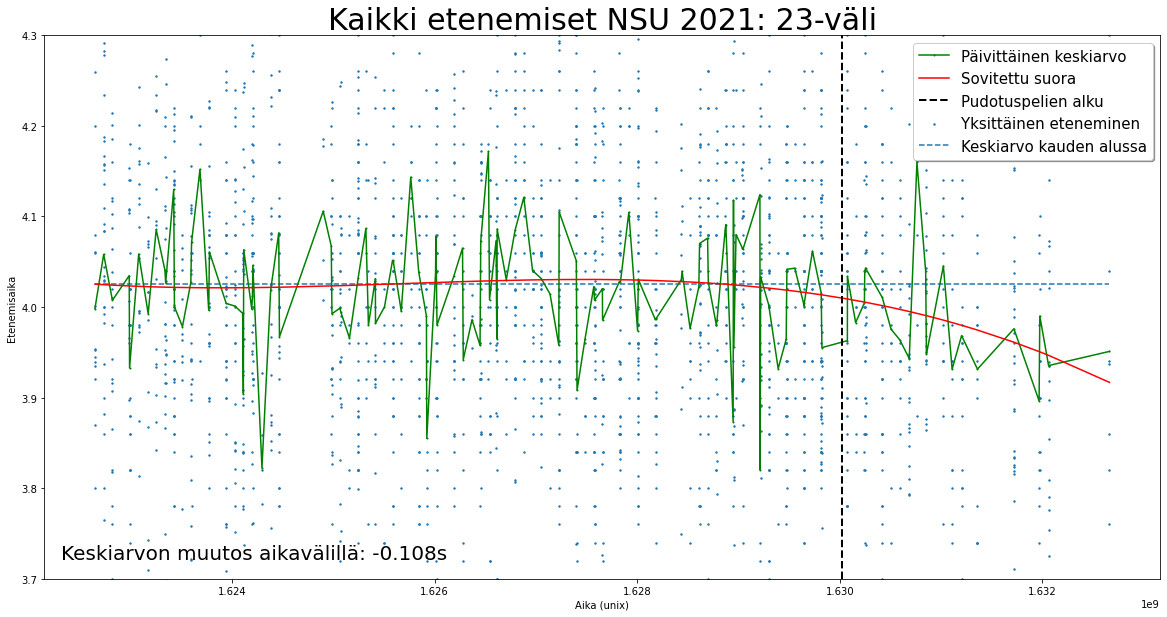

In [14]:
runs = all_runs[all_runs['base'] == 2]
runs = runs[runs['aika'] < 5.3]
# runs = runs[runs['unix_time'] < men_runkosarja]

by_day = runs.groupby(by='unix_time').mean()
by_day['juoksu'].head()

fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize = (20, 10))

y = runs['juoksu']
x = runs['unix_time']
ax1.plot(by_day.juoksu, marker='o', markersize=1, label="Päivittäinen keskiarvo", color="g")
ax1.scatter(x, y, label="Yksittäinen eteneminen", s=2)
mean_line = ax1.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 3))(np.unique(x)), color="r", label="Sovitettu suora")
box = mean_line[0]
mean_x = box.get_data()[0]
mean_y = box.get_data()[1]
mean_y0 = mean_y[0]
mean_y1 = mean_y[-1]
mean_x0 = mean_x[0]
mean_x1 = mean_x[-1]
diff = mean_y1 - mean_y0

ax1.hlines(y=mean_y0, xmin=mean_x0, xmax=mean_x1, ls="--", label="Keskiarvo kauden alussa")
ax1.axvline(x=men_runkosarja, color="black", lw=2, ls="--", label="Pudotuspelien alku")
ax1.set(xlabel="Aika (unix)", ylabel="Etenemisaika")
ax1.set_title('Kaikki etenemiset NSU 2021: 23-väli', fontsize=30)
props = dict(boxstyle='round', facecolor='white', alpha=0.8)

ax1.set_ylim(ymin=3.7, ymax=4.3)

ax1.annotate('Keskiarvon muutos aikavälillä: {}s'.format(round(diff, 3)), xy=(0, 0), xytext=(17, 35), va='top',
             xycoords='axes fraction', textcoords='offset points', fontsize=20)

ax1.legend(shadow=True, fontsize=15)

fig.savefig('./kaikki_etenemiset_kokokausi_23_{}.png'.format(csv_name))

### 23-väli

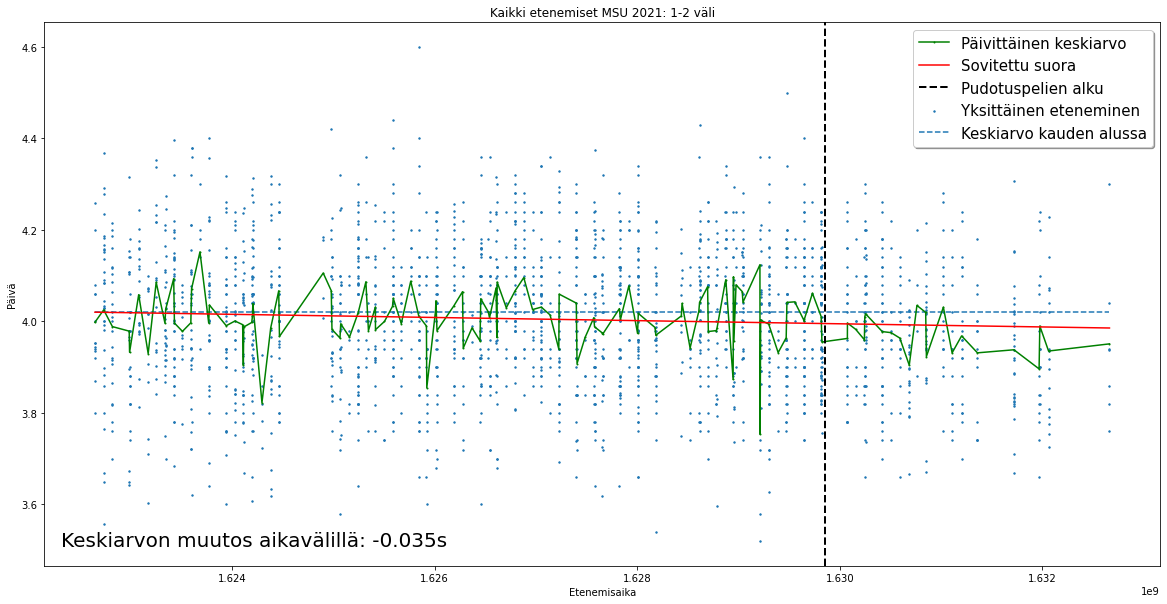

In [15]:
runs = all_runs[all_runs['base'] == 2]
runs = runs[runs['aika'] < 4.7]

by_day = runs.groupby(by='unix_time').mean()
by_day['juoksu'].head()

fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize = (20, 10))

y = runs['juoksu']
x = runs['unix_time']
ax1.plot(by_day.juoksu, marker='o', markersize=1, label="Päivittäinen keskiarvo", color="g")
ax1.scatter(x, y, label="Yksittäinen eteneminen", s=2)
mean_line = ax1.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color="r", label="Sovitettu suora")
box = mean_line[0]
mean_x = box.get_data()[0]
mean_y = box.get_data()[1]
mean_y0 = mean_y[0]
mean_y1 = mean_y[-1]
mean_x0 = mean_x[0]
mean_x1 = mean_x[-1]
diff = mean_y1 - mean_y0

ax1.hlines(y=mean_y0, xmin=mean_x0, xmax=mean_x1, ls="--", label="Keskiarvo kauden alussa")
ax1.axvline(x=1629849625, color="black", lw=2, ls="--", label="Pudotuspelien alku")
ax1.set(title="Kaikki etenemiset MSU 2021: 1-2 väli", xlabel="Etenemisaika", ylabel="Päivä")
props = dict(boxstyle='round', facecolor='white', alpha=0.8)

ax1.annotate('Keskiarvon muutos aikavälillä: {}s'.format(round(diff, 3)), xy=(0, 0), xytext=(17, 35), va='top',
             xycoords='axes fraction', textcoords='offset points', fontsize=20)

ax1.legend(shadow=True, fontsize=15)

### 3K väli - koko kausi

NameError: name 'v' is not defined

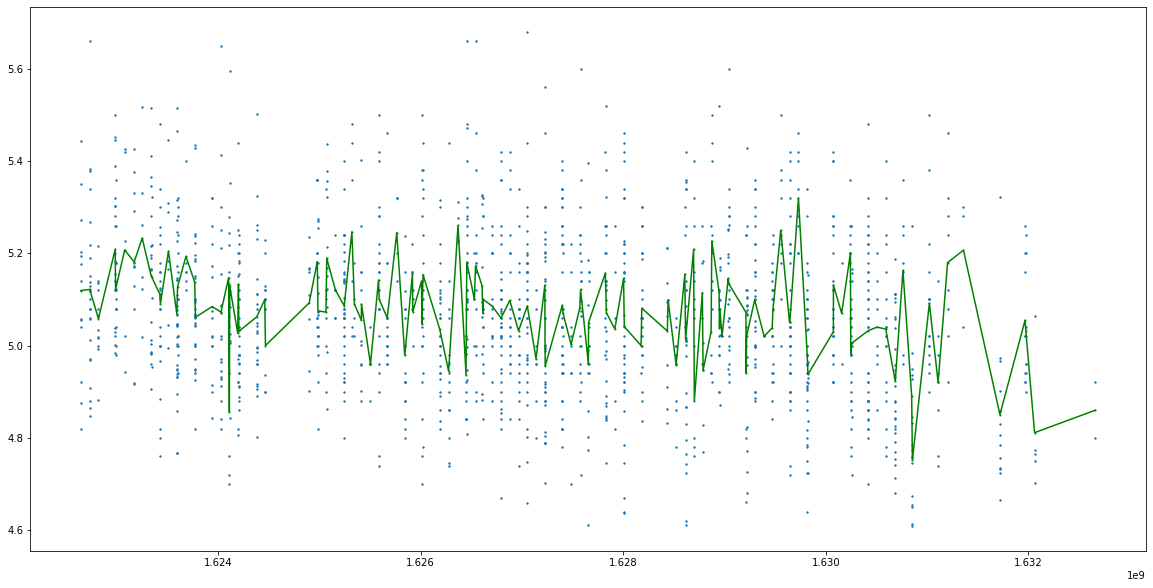

In [16]:
runs = all_runs[all_runs['base'] == 3]
runs = runs[runs['aika'] < 6]

by_day = runs.groupby(by='unix_time').mean()
by_day['juoksu'].head()

fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize = (20, 10))

y = runs['juoksu']
x = runs['unix_time']
ax1.plot(by_day.juoksu, marker='o', markersize=1, label="Päivittäinen keskiarvo", color="g")
ax1.scatter(x, y, label="Yksittäinen eteneminen", s=2)
mean_line = ax1.plot( v, color="r", label="Sovitettu suora")
box = mean_line[0]
mean_x = box.get_data()[0]
mean_y = box.get_data()[1]
mean_y0 = mean_y[0]
mean_y1 = mean_y[-1]
mean_x0 = mean_x[0]
mean_x1 = mean_x[-1]
diff = mean_y1 - mean_y0

ax1.set_ylim([4.6, 5.6])
ax1.hlines(y=mean_y0, xmin=mean_x0, xmax=mean_x1, ls="--", label="Keskiarvo kauden alussa")
ax1.axvline(x=1629849625, color="black", lw=2, ls="--", label="Pudotuspelien alku")
ax1.set(title="Kaikki etenemiset MSU 2021: 3-K väli", xlabel="Etenemisaika", ylabel="Päivä")
props = dict(boxstyle='round', facecolor='white', alpha=0.8)

ax1.annotate('Keskiarvon muutos aikavälillä: {}s'.format(round(diff, 3)), xy=(0, 0), xytext=(17, 35), va='top',
             xycoords='axes fraction', textcoords='offset points', fontsize=20)

ax1.legend(shadow=True, fontsize=15)

### 3K - runkosarja

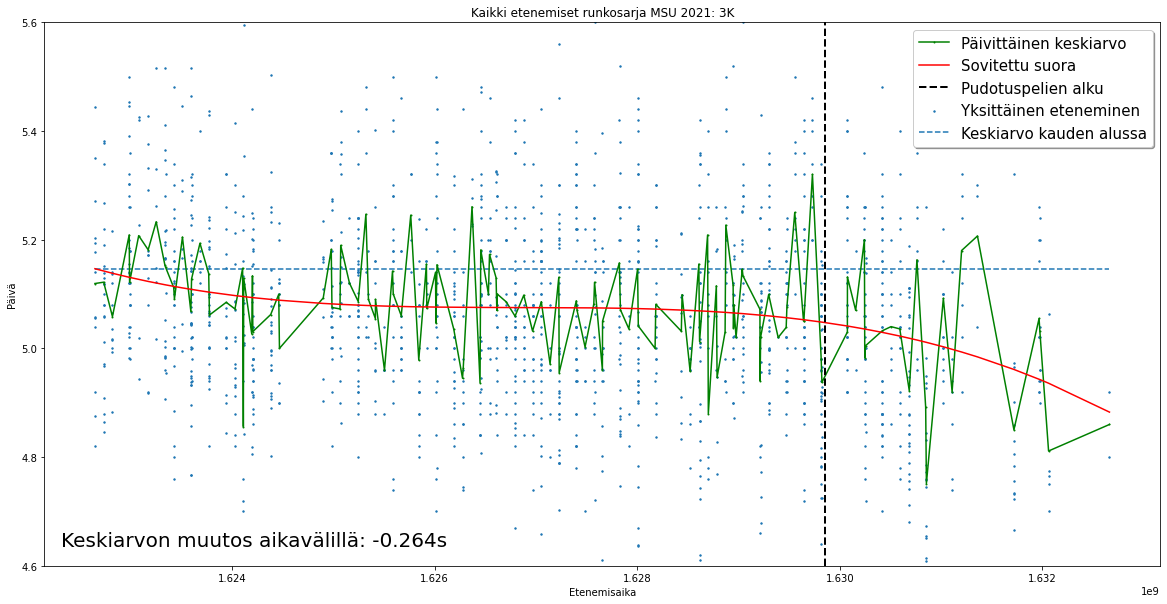

In [17]:
runs = all_runs[all_runs['base'] == 3]
runs = runs[runs['aika'] < 6]
# runs = runs[runs['unix_time'] < men_runkosarja]

by_day = runs.groupby(by='unix_time').mean()
by_day['juoksu'].head()

fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize = (20, 10))

y = runs['juoksu']
x = runs['unix_time']
ax1.plot(by_day.juoksu, marker='o', markersize=1, label="Päivittäinen keskiarvo", color="g")
ax1.scatter(x, y, label="Yksittäinen eteneminen", s=2)
mean_line = ax1.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 3))(np.unique(x)), color="r", label="Sovitettu suora")
box = mean_line[0]
mean_y = box.get_data()[1]
# mean_x = box.get_data()[0]
mean_y0 = mean_y[0]
mean_y1 = mean_y[-1]
mean_x0 = mean_x[0]
mean_x1 = mean_x[-1]
diff = mean_y1 - mean_y0

ax1.set_ylim([4.6, 5.6])
ax1.hlines(y=mean_y0, xmin=mean_x0, xmax=mean_x1, ls="--", label="Keskiarvo kauden alussa")
ax1.axvline(x=1629849625, color="black", lw=2, ls="--", label="Pudotuspelien alku")
ax1.set(title="Kaikki etenemiset runkosarja MSU 2021: 3K", xlabel="Etenemisaika", ylabel="Päivä")
props = dict(boxstyle='round', facecolor='white', alpha=0.8)

ax1.annotate('Keskiarvon muutos aikavälillä: {}s'.format(round(diff, 3)), xy=(0, 0), xytext=(17, 35), va='top',
             xycoords='axes fraction', textcoords='offset points', fontsize=20)

ax1.legend(shadow=True, fontsize=15)

# Joukkueiden slopet kolmoselta kotiin kauden aikana

TypeError: expected non-empty vector for x

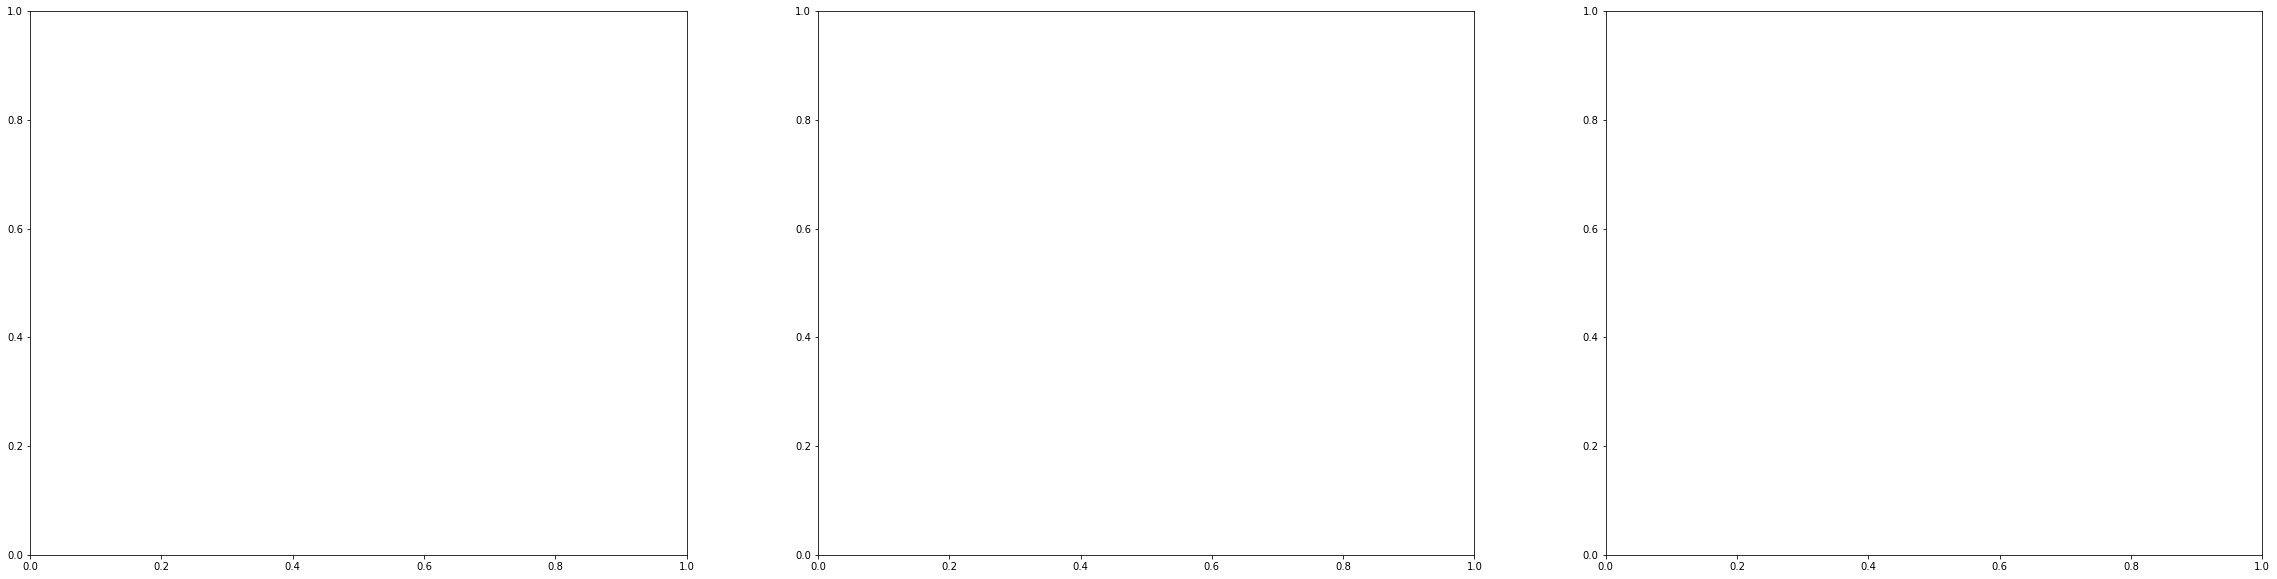

In [18]:
runs = all_runs[all_runs['base'] == 3]
runs = runs[runs['aika'] < 6.5]
# runs = runs[runs['aika'] < 6]

teams = [
    [1004, 1002, 1006, 1005],
    [1009, 1011, 1008, 1013],
    [1003, 1007, 1012, 1001],
    [1010, 1014, 1015]
]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (40, 10))
# for id in [1001, 1002, 1003, 1008]

teams_nsu = [
    [2005, 2010, 2006, 2011],
    [2007, 2002, 2004, 2001],
    [2003, 2013, 2008, 2009, 2012]
]

poly = 2

# axs = [ax1, ax2, ax3, ax4]

for i, ax in enumerate(axs.flatten()):
    for id in teams_nsu[i]:
        team_runs = runs[runs['team'] == id]
        y = team_runs['juoksu']
        x = team_runs['unix_time']
        mean_line = ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, poly))(np.unique(x)), label=id, lw=3)
        b = mean_line[0].get_data()
        ax.text(b[0][-1], b[1][-1], f'  {nsu[id]}', fontsize=20)
        
        if(id == 1):
            by_day = team_runs.groupby(by='unix_time').mean()
            ax.plot(by_day.juoksu, marker='o', markersize=1, label="Päivittäinen keskiarvo", color="g")
        
    ax.set_ylim([4.9, 5.6])
    ax.grid()

# ax1.axvline(x=1629849625, color="black", lw=2, ls="--", label="Pudotuspelien alku")
ax1.set(title="Kaikki etenemiset MSU 2021: 1-2 väli", xlabel="Kausi", ylabel="Etenemisaika")
props = dict(boxstyle='round', facecolor='white', alpha=0.8)

# ax1.legend(shadow=True, fontsize=15)

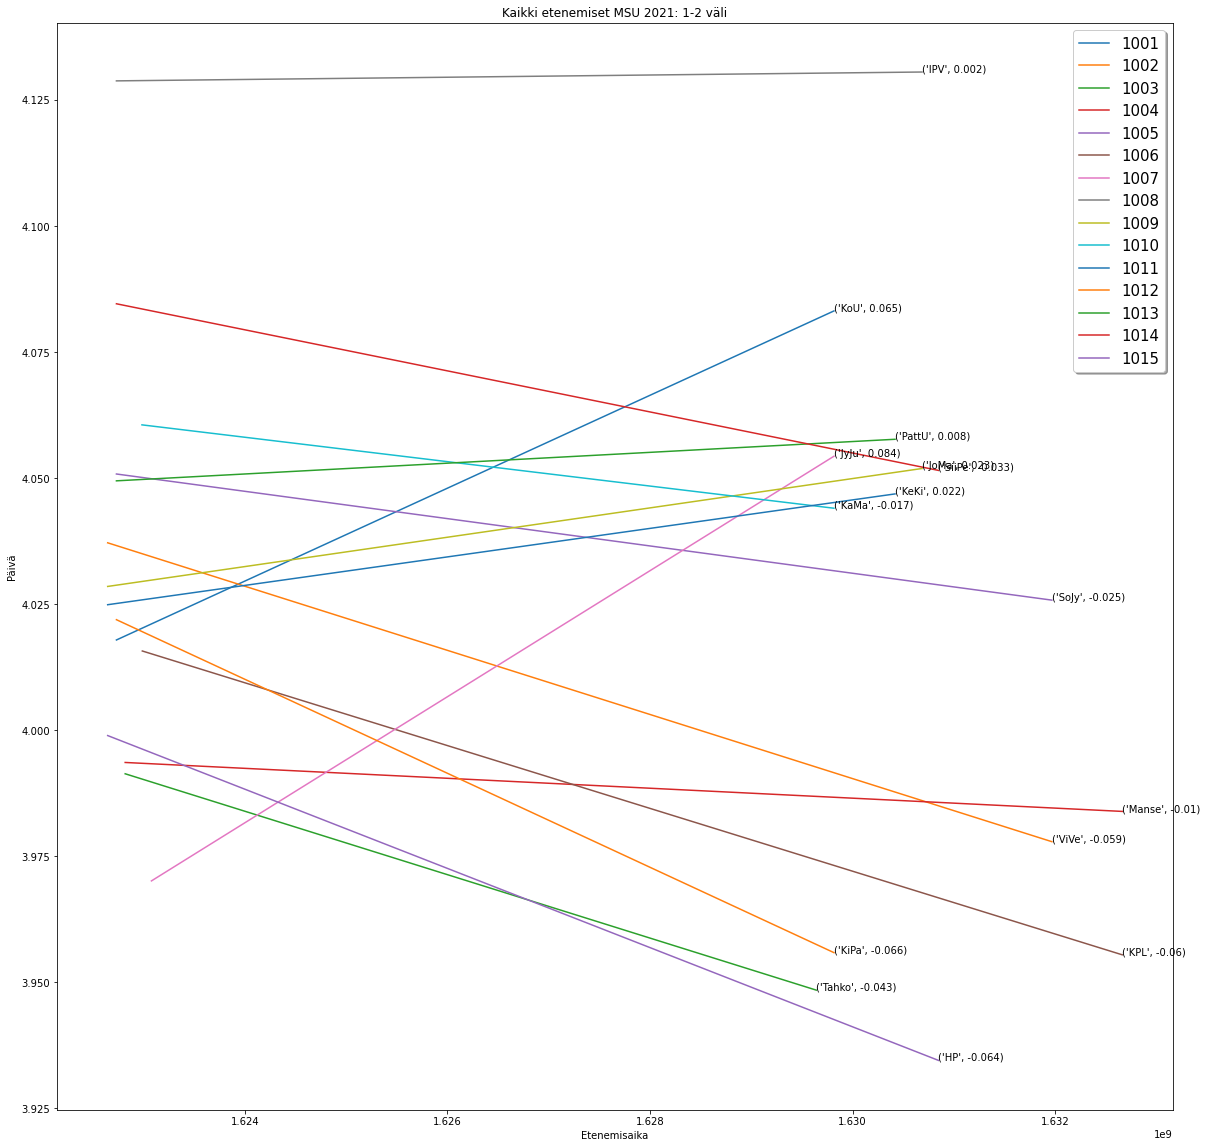

In [20]:
runs = all_runs[all_runs['base'] == 1]
# runs = runs[runs['aika'] < 6]

by_day['juoksu'].head()

fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize = (20, 20))
for id in range(1001, 1016):
    team_runs = runs[runs['team'] == id]
    y = team_runs['juoksu']
    x = team_runs['unix_time']
    mean_line = ax1.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), label=id)
    b = mean_line[0].get_data()
    box = mean_line[0]
    mean_y = box.get_data()[1]
    # mean_x = box.get_data()[0]
    mean_y0 = mean_y[0]
    mean_y1 = mean_y[-1]
    mean_x0 = mean_x[0]
    mean_x1 = mean_x[-1]
    diff = mean_y1 - mean_y0
    ax1.text(b[0][-1], b[1][-1], f'{msu[id], round(diff, 3)}')

# ax1.set_ylim([4.9, 5.25])
# ax1.axvline(x=1629849625, color="black", lw=2, ls="--", label="Pudotuspelien alku")
ax1.set(title="Kaikki etenemiset MSU 2021: 1-2 väli", xlabel="Etenemisaika", ylabel="Päivä")
props = dict(boxstyle='round', facecolor='white', alpha=0.8)

ax1.legend(shadow=True, fontsize=15)

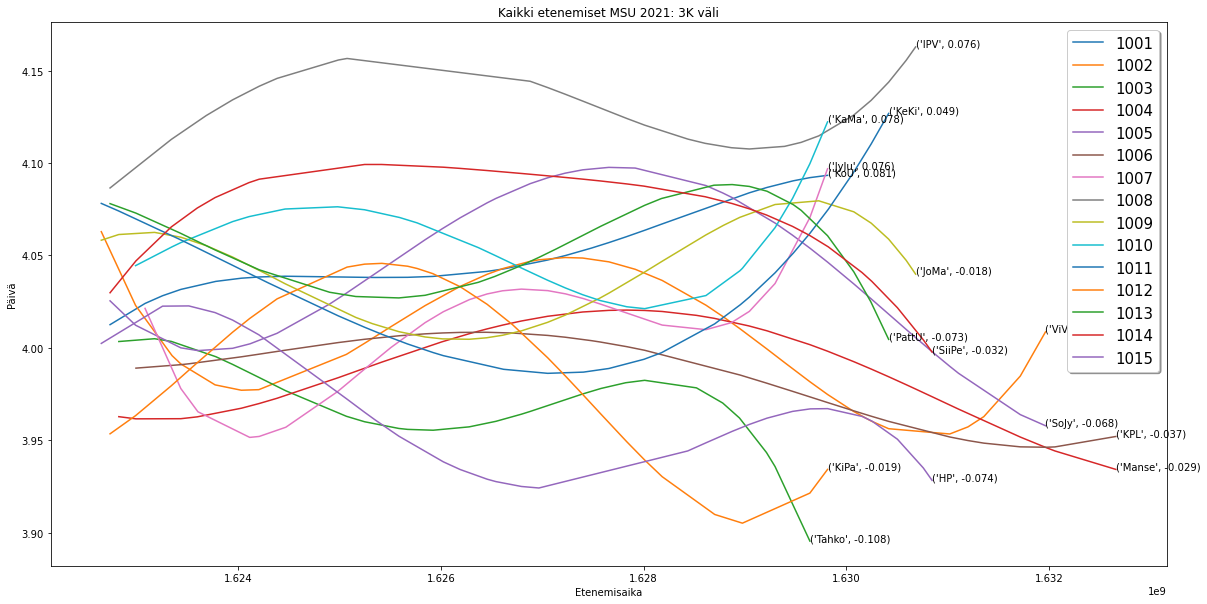

In [22]:
runs = all_runs[all_runs['base'] == 1]
# runs = runs[runs['aika'] < 6]

fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize = (20, 10))
for id in range(1001, 1016):
    team_runs = runs[runs['team'] == id]
    y = team_runs['juoksu']
    x = team_runs['unix_time']
    mean_line = ax1.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 4))(np.unique(x)), label=id)
    b = mean_line[0].get_data()
    box = mean_line[0]
    mean_y = box.get_data()[1]
    # mean_x = box.get_data()[0]
    mean_y0 = mean_y[0]
    mean_y1 = mean_y[-1]
    mean_x0 = mean_x[0]
    mean_x1 = mean_x[-1]
    diff = mean_y1 - mean_y0
    ax1.text(b[0][-1], b[1][-1], f'{msu[id], round(diff, 3)}')

# ax1.set_ylim([4.9, 5.25])
# ax1.axvline(x=1629849625, color="black", lw=2, ls="--", label="Pudotuspelien alku")
ax1.set(title="Kaikki etenemiset MSU 2021: 3K väli", xlabel="Etenemisaika", ylabel="Päivä")
props = dict(boxstyle='round', facecolor='white', alpha=0.8)

ax1.legend(shadow=True, fontsize=15)

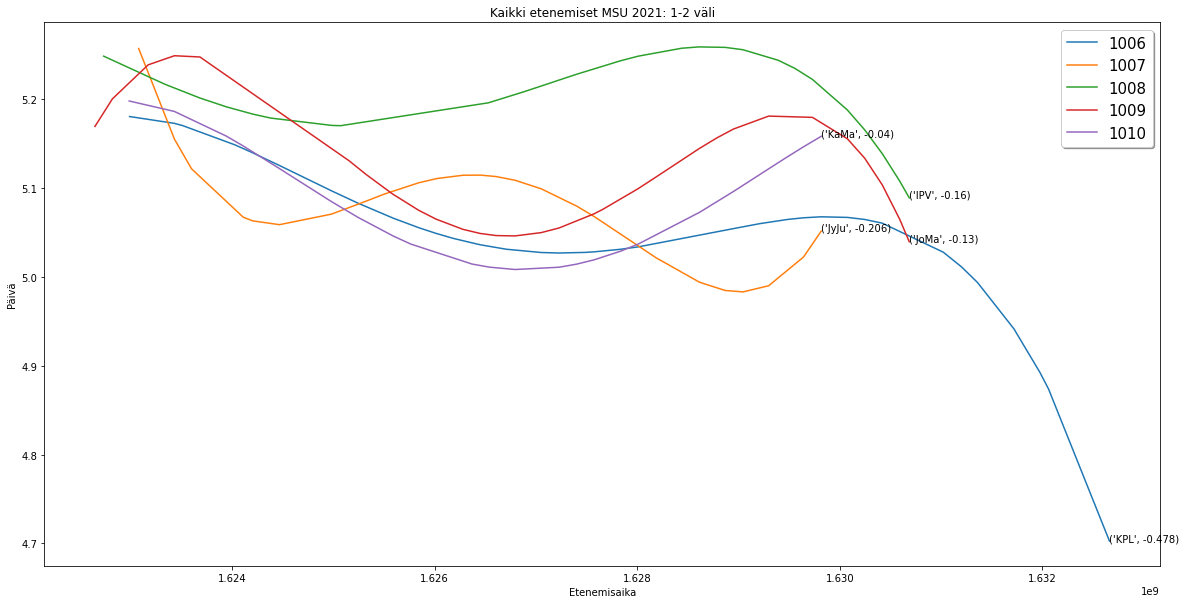

In [23]:
runs = all_runs[all_runs['base'] == 3]
# runs = runs[runs['aika'] < 6]

fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize = (20, 10))
for id in range(1006, 1011):
    team_runs = runs[runs['team'] == id]
    y = team_runs['juoksu']
    x = team_runs['unix_time']
    mean_line = ax1.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 4))(np.unique(x)), label=id)
    b = mean_line[0].get_data()
    box = mean_line[0]
    mean_y = box.get_data()[1]
    # mean_x = box.get_data()[0]
    mean_y0 = mean_y[0]
    mean_y1 = mean_y[-1]
    mean_x0 = mean_x[0]
    mean_x1 = mean_x[-1]
    diff = mean_y1 - mean_y0
    ax1.text(b[0][-1], b[1][-1], f'{msu[id], round(diff, 3)}')

# ax1.set_ylim([4.9, 5.25])
# ax1.axvline(x=1629849625, color="black", lw=2, ls="--", label="Pudotuspelien alku")
ax1.set(title="Kaikki etenemiset MSU 2021: 1-2 väli", xlabel="Etenemisaika", ylabel="Päivä")
props = dict(boxstyle='round', facecolor='white', alpha=0.8)

ax1.legend(shadow=True, fontsize=15)

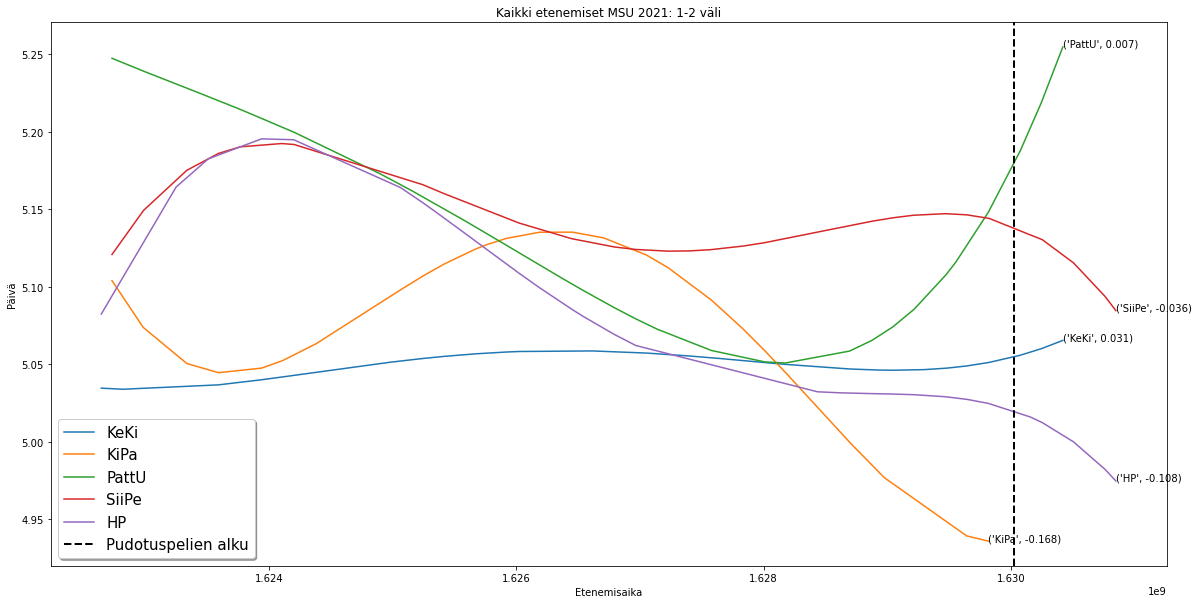

In [24]:
runs = all_runs[all_runs['base'] == 3]
# runs = runs[runs['aika'] < 6]

fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize = (20, 10))
for id in range(1011, 1016):
    team_runs = runs[runs['team'] == id]
    y = team_runs['juoksu']
    x = team_runs['unix_time']
    mean_line = ax1.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 4))(np.unique(x)), label=msu[id])
    b = mean_line[0].get_data()
    box = mean_line[0]
    mean_y = box.get_data()[1]
    # mean_x = box.get_data()[0]
    mean_y0 = mean_y[0]
    mean_y1 = mean_y[-1]
    mean_x0 = mean_x[0]
    mean_x1 = mean_x[-1]
    diff = mean_y1 - mean_y0
    ax1.text(b[0][-1], b[1][-1], f'{msu[id], round(diff, 3)}')

# ax1.set_ylim([4.9, 5.25])
ax1.axvline(x=men_runkosarja, color="black", lw=2, ls="--", label="Pudotuspelien alku")
ax1.set(title="Kaikki etenemiset MSU 2021: 1-2 väli", xlabel="Etenemisaika", ylabel="Päivä")
props = dict(boxstyle='round', facecolor='white', alpha=0.8)

ax1.legend(shadow=True, fontsize=15)